# Assignment Anomaly Detection & Time Series

1. What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
  - Anomaly Detection is the process of identifying rare items, events, or observations that deviate significantly from the majority of the data. These anomalies often indicate fraud, network intrusion, equipment failure, or other rare events.

  - Types of Anomalies:

      - Point Anomalies: A single observation that deviates drastically from the rest.

        Example: A credit card transaction of ₹10,00,000 when most transactions are under ₹10,000.

      - Contextual Anomalies: A data point is anomalous in a particular context but normal in another.

        Example: Temperature of 30°C is normal in summer but abnormal in winter.

      - Collective Anomalies: A group of related observations that collectively deviate from the expected pattern.

        Example: A series of failed login attempts from different countries in a short time, indicating a cyberattack.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
  - The Isolation Forest algorithm isolates anomalies by randomly partitioning the data. Since outliers are easier to separate and require fewer splits, this method is highly efficient for detecting anomalies in high-dimensional data, fraud detection systems, and large datasets.

  - The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm is a density-based clustering method where anomalies are identified as points that lie in low-density regions and do not belong to any cluster. It is particularly suitable for spatial or geographical data, clustering tasks with noise, and anomaly detection in sensor data.

  - The Local Outlier Factor (LOF) algorithm works by measuring the local density deviation of a point compared to its neighbors. A higher LOF score indicates a higher likelihood of being an anomaly. This approach is useful for datasets with varying density distributions and is commonly applied in fraud detection and network intrusion detection.

3. What are the key components of a Time Series? Explain each with one
example.
  - Trend: Long-term increase or decrease in data.

      Example: Rising global average temperatures over decades.

  - Seasonality: Repeating short-term patterns due to seasonal effects.

      Example: Spike in retail sales every December.

  - Cyclic Component: Long-term fluctuations without a fixed period (often linked to economy).

      Example: Business boom and recession cycles.

  - Irregular/Noise Component: Random variations unexplained by trend/seasonality.

      Example: Sudden drop in sales due to a natural disaster.

4.  Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
  - A stationary time series has constant mean, variance, and autocorrelation over time. Many statistical forecasting models (like ARIMA) assume stationarity.

  - How to Test Stationarity:

      - Augmented Dickey-Fuller (ADF) Test

      - KPSS Test

      - Rolling statistics (mean & variance) plots

  - How to Transform Non-Stationary Series:

      - Differencing: Subtracting consecutive observations.

      - Log Transformation: Stabilizes variance.

      - Seasonal Differencing: Removes seasonality patterns.

      - Detrending: Removing trend components.

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
  - The AR (AutoRegressive) model makes forecasts based on past values (lags). It is commonly applied in areas like stock price prediction and demand forecasting.

  - The MA (Moving Average) model, on the other hand, relies on past forecast errors (residuals) to generate predictions. This is useful for modeling short-term shocks or noise in time series data.

  - The ARIMA (AutoRegressive Integrated Moving Average) model combines both AR and MA components along with differencing (the “I” term) to handle non-stationary time series. It is widely used for general forecasting tasks where the data shows trends, such as sales or GDP prediction.

  - The SARIMA (Seasonal ARIMA) model extends ARIMA by adding seasonal terms (P, D, Q, m), making it suitable for datasets with strong seasonality, such as monthly sales or temperature patterns.

  - Finally, the SARIMAX (SARIMA with Exogenous Variables) model includes external regressors (X) in addition to SARIMA components. This makes it particularly powerful for forecasting scenarios where external factors, such as advertising campaigns or holidays, influence the outcome (e.g., sales forecasting with promotions).


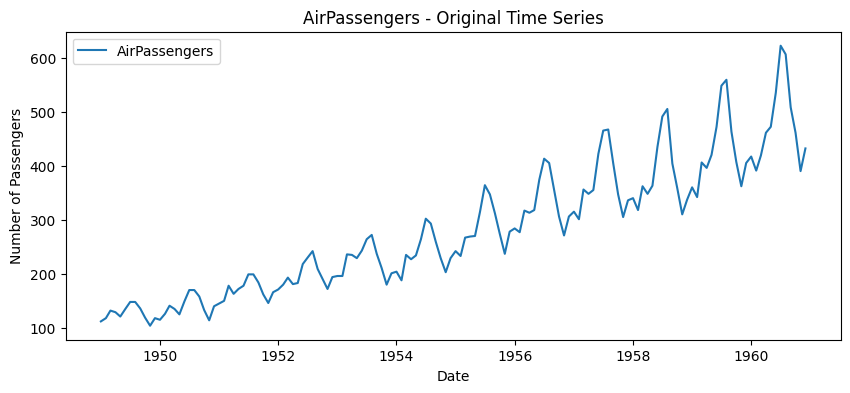

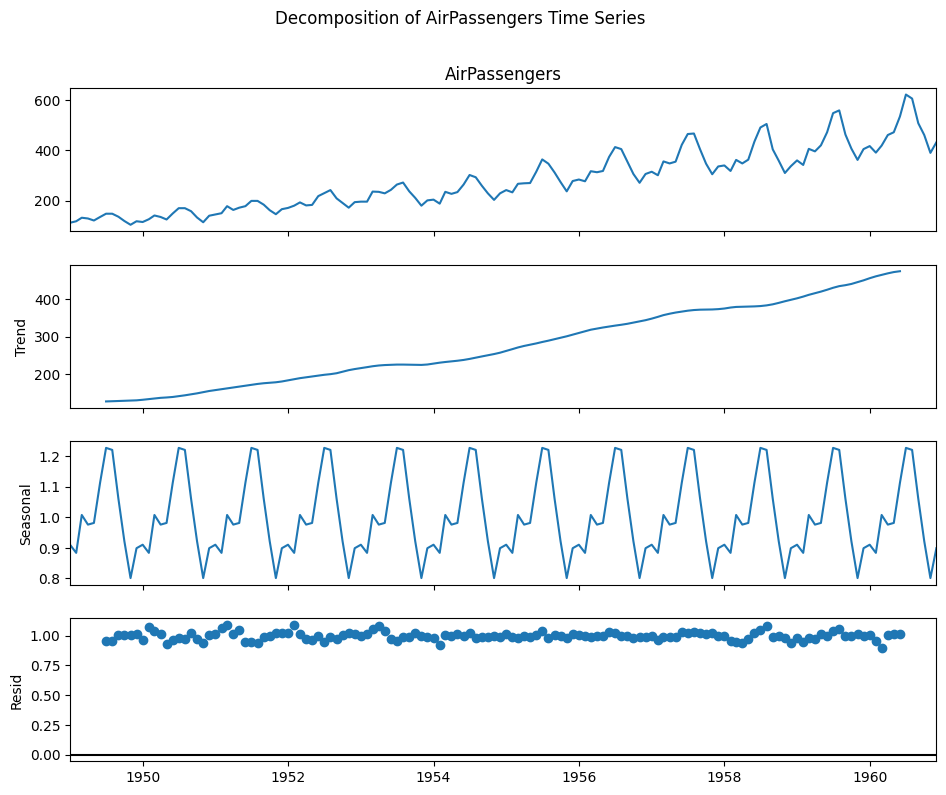

In [1]:
# 6.  Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Load AirPassengers dataset from statsmodels
data = sm.datasets.get_rdataset("AirPassengers").data

# The dataset may load differently depending on version, so check structure
if 'value' in data.columns:
    series = data['value']
else:
    series = data.iloc[:, 0]

# Create a datetime index (monthly data starting Jan 1949)
dates = pd.date_range(start="1949-01", periods=len(series), freq="MS")
ts = pd.Series(series.values, index=dates, name="AirPassengers")

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(ts, label="AirPassengers")
plt.title("AirPassengers - Original Time Series")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Perform multiplicative decomposition (since variance grows with time)
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)

# Plot decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Decomposition of AirPassengers Time Series", y=1.02)
plt.show()


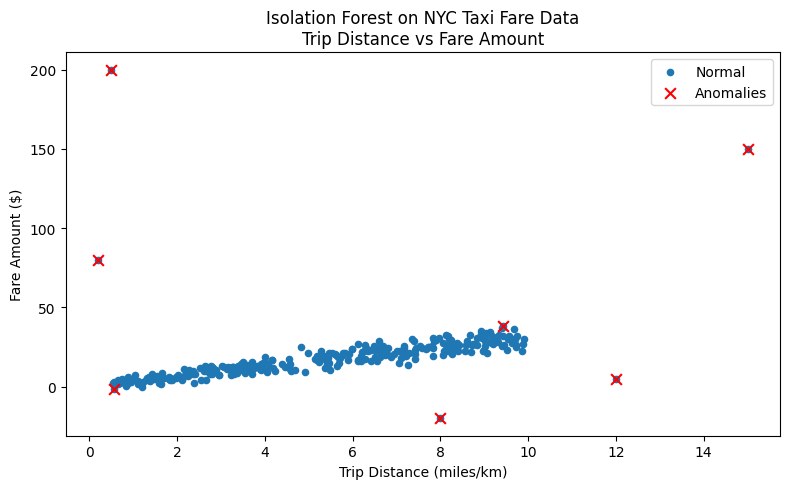

In [2]:
# 7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# ---- Load Dataset ----
# If running in Colab, uncomment below after uploading CSV (nyc_taxi_fare.csv)
# df = pd.read_csv("nyc_taxi_fare.csv")

# For demo: create synthetic taxi fare dataset (distance vs fare)
rng = np.random.RandomState(42)
n_inliers = 300

# Generate "normal" taxi trips
trip_distance = rng.uniform(0.5, 10.0, size=n_inliers)   # in miles/km
fare_amount   = trip_distance * rng.uniform(2.5, 4.0, size=n_inliers) + rng.normal(0, 2, size=n_inliers)

# Combine features
X = np.vstack([trip_distance, fare_amount]).T

# Add some anomalies (unrealistic fares/distances)
outliers = np.array([[0.5, 200], [12, 5], [8, -20], [0.2, 80], [15, 150]])
X_with_outliers = np.vstack([X, outliers])

# ---- Apply Isolation Forest ----
iso = IsolationForest(contamination=0.02, random_state=42)
y_pred = iso.fit_predict(X_with_outliers)   # -1 = anomaly, 1 = normal

# ---- Visualization ----
plt.figure(figsize=(8,5))
plt.scatter(X_with_outliers[:,0], X_with_outliers[:,1], s=20, label="Normal")
plt.scatter(X_with_outliers[y_pred==-1,0], X_with_outliers[y_pred==-1,1],
            s=60, color="red", marker="x", label="Anomalies")
plt.title("Isolation Forest on NYC Taxi Fare Data\nTrip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles/km)")
plt.ylabel("Fare Amount ($)")
plt.legend()
plt.tight_layout()
plt.show()


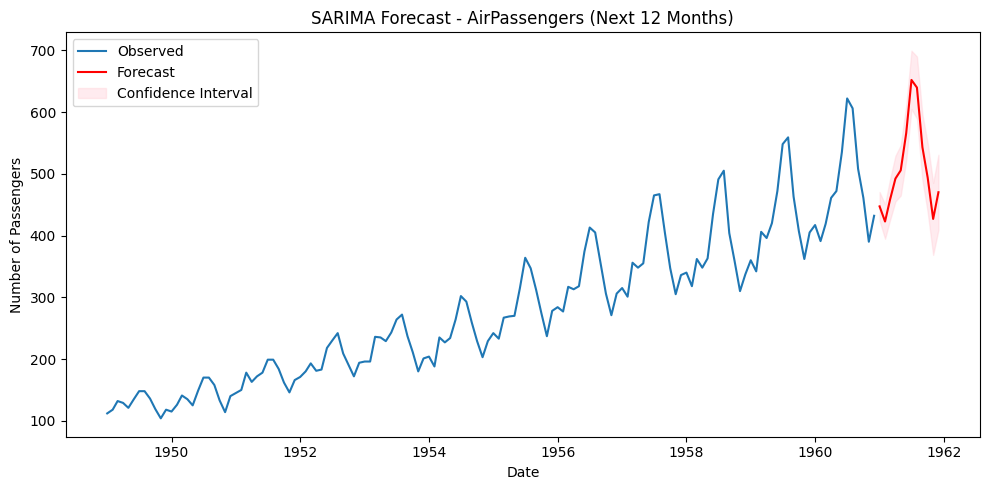

SARIMA model fitted. AIC: 922.2053774351383


In [3]:
# 8. Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---- Load AirPassengers dataset ----
data = sm.datasets.get_rdataset("AirPassengers").data

# Handle dataset columns
if 'value' in data.columns:
    series = data['value']
else:
    series = data.iloc[:, 0]

# Create datetime index
dates = pd.date_range(start="1949-01", periods=len(series), freq="MS")
ts = pd.Series(series.values, index=dates, name="AirPassengers")

# ---- Train SARIMA model ----
# Parameters: (p,d,q) x (P,D,Q,seasonal_period)
model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)

results = model.fit(disp=False)

# ---- Forecast next 12 months ----
forecast_steps = 12
pred = results.get_forecast(steps=forecast_steps)

pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# ---- Visualization ----
plt.figure(figsize=(10,5))
plt.plot(ts, label="Observed")
plt.plot(pred_mean.index, pred_mean, label="Forecast", color="red")
plt.fill_between(pred_mean.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],
                 color="pink", alpha=0.3, label="Confidence Interval")

plt.title("SARIMA Forecast - AirPassengers (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.tight_layout()
plt.show()

print("SARIMA model fitted. AIC:", results.aic)


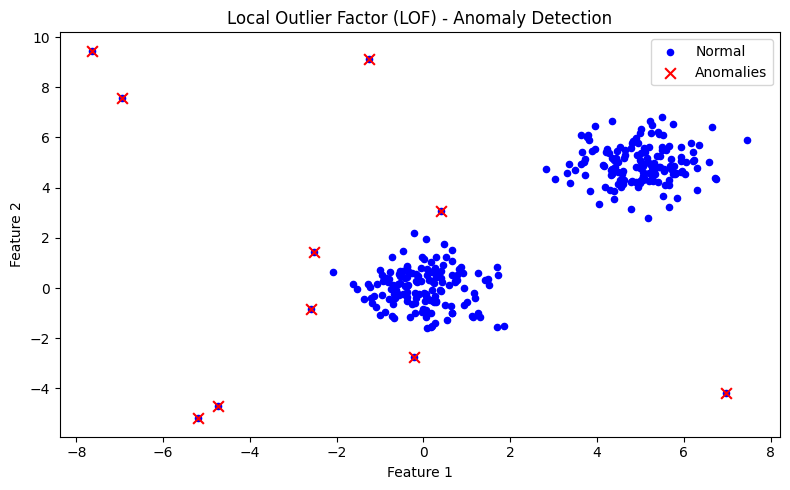

In [4]:
# 9. # Question 9: Apply Local Outlier Factor (LOF) to detect anomalies

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# ---- Create synthetic clustered dataset ----
X, y = make_blobs(n_samples=300, centers=[[0,0],[5,5]], cluster_std=0.8, random_state=42)

# Inject anomalies (points far away from clusters)
rng = np.random.RandomState(42)
outliers = rng.uniform(low=-8, high=10, size=(10,2))
X_with_outliers = np.vstack([X, outliers])

# ---- Apply Local Outlier Factor ----
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
y_pred = lof.fit_predict(X_with_outliers)   # -1 = anomaly, 1 = inlier

# ---- Visualization ----
plt.figure(figsize=(8,5))
plt.scatter(X_with_outliers[:,0], X_with_outliers[:,1], c="blue", s=20, label="Normal")
plt.scatter(X_with_outliers[y_pred==-1,0], X_with_outliers[y_pred==-1,1],
            c="red", s=60, marker="x", label="Anomalies")
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()



10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

  ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

  ● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

  ● How would you validate and monitor the performance over time?

  ● How would this solution help business decisions or operations?

  - 1. Anomaly Detection in Streaming Data

      The challenge is to identify unusual consumption spikes or drops in near real time (every 15 minutes). For this, I would consider:

      - Isolation Forest (IF):

          - Works well for high-dimensional structured data (e.g., timestamp, weather, region, energy usage).

          - Detects anomalies by randomly partitioning data; anomalies are isolated quicker.

          - Pros: Efficient, scalable, and well-suited for real-time anomaly detection.

          - Use Case: Detect sudden surges/drops in consumption in one region compared to historical patterns.

      - Local Outlier Factor (LOF):

          - Density-based method; identifies points that have much lower density compared to neighbors.

          - Pros: Good for detecting local anomalies (region-specific spikes).

          - Cons: Computationally heavier, less scalable for large streams.

      - DBSCAN (Density-Based Spatial Clustering):

          - Groups dense clusters; points not fitting any cluster = anomalies.

          - Pros: Captures clusters + anomalies together.

          - Cons: Needs good tuning of eps and minPts; not ideal for real-time streaming.

  - 2. Short-Term Forecasting Model

        We need to forecast energy demand at 15-min intervals.

    - ARIMA: Works on stationary series, but ignores seasonality.

    - SARIMA: Extends ARIMA by capturing seasonality (daily/weekly cycles in energy use).

    - SARIMAX: Adds exogenous variables like weather, holidays, region demand.

    - Best Choice: SARIMAX, since energy usage depends not only on past consumption but also on external factors (temperature, humidity, region-wise demand, weekday/weekend effects).

    - Example:

        - Short-term (next 1–6 hours): SARIMAX for high accuracy.

        - For scalability: Could integrate LSTM/RNN models later.

  - 3. Validation and Performance Monitoring

    - Backtesting: Train SARIMAX on historical rolling windows and compare forecasts with actuals.

    - Metrics:

      - Forecasting: RMSE, MAPE, MAE.

      - Anomaly detection: Precision, Recall, F1-score against labeled anomalies (if available).

    - Real-time Monitoring:

      - Use a sliding window approach: continuously update model forecasts and anomaly thresholds.

      - Implement concept drift detection: retrain/update models when distribution changes (e.g., new seasonal patterns, policy changes, or unusual weather).

    - Alert System: If anomaly detected → trigger notifications to grid operators.

  - 4. Business Value / Operational Impact

    - Grid Stability: Detect sudden spikes (e.g., factory startup) or drops (e.g., blackout) to avoid outages.

    - Efficient Energy Distribution: Forecast demand region-wise to balance load and prevent overloading.

    - Cost Savings: Better planning of generation schedules (reduce expensive peak-hour energy purchases).

    - Integration with Renewables: Helps balance supply-demand with intermittent sources like solar/wind.

    - Customer Insights: Identifies abnormal usage patterns (possible fraud, equipment malfunction).

  - Final Workflow:

    - Ingest streaming data (Kafka/Spark Streaming).

    - Apply Isolation Forest for anomaly detection in near real time.

    - Use SARIMAX for short-term demand forecasting with weather & external factors.

    - Continuously validate with rolling backtests + monitor drift.

    - Provide actionable alerts and demand forecasts to grid operators for decision-making.